In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

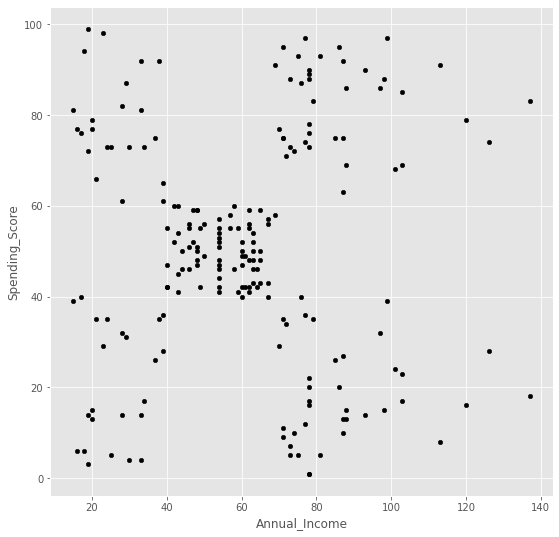

In [2]:
mall = pd.read_csv('Data\Mall_Customers.csv')
mall.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)
mall_clust = mall[['Annual_Income', 'Spending_Score']]

mall.plot(kind="scatter",
           x="Annual_Income",
           y="Spending_Score",
           figsize=(9,9),
           color="black");

In [4]:
from sklearn import linear_model

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the data
regression_model.fit(X = pd.DataFrame(mall["Annual_Income"]), 
                     y = mall["Spending_Score"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

49.61035766442925
[0.0097365]


In [5]:
regression_model.score(X = pd.DataFrame(mall["Annual_Income"]), 
                       y = mall["Spending_Score"])

9.806640037357539e-05

In [6]:
train_prediction = regression_model.predict(X = pd.DataFrame(mall["Annual_Income"]))

# Actual - prediction = residuals
residuals = mall["Spending_Score"] - train_prediction

residuals.describe()

count    2.000000e+02
mean    -9.592327e-16
std      2.582226e+01
min     -4.936980e+01
25%     -1.561250e+01
50%     -2.091523e-01
75%      2.264237e+01
max      4.920465e+01
Name: Spending_Score, dtype: float64

In [8]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mall["Spending_Score"] - mall["Spending_Score"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

9.806640037357539e-05

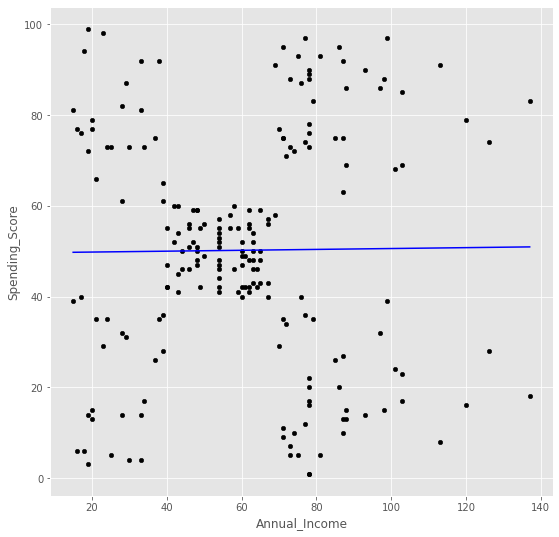

In [9]:
mall.plot(kind="scatter",
           x="Annual_Income",
           y="Spending_Score",
           figsize=(9,9),
           color="black")

# Plot regression line
plt.plot(mall["Annual_Income"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

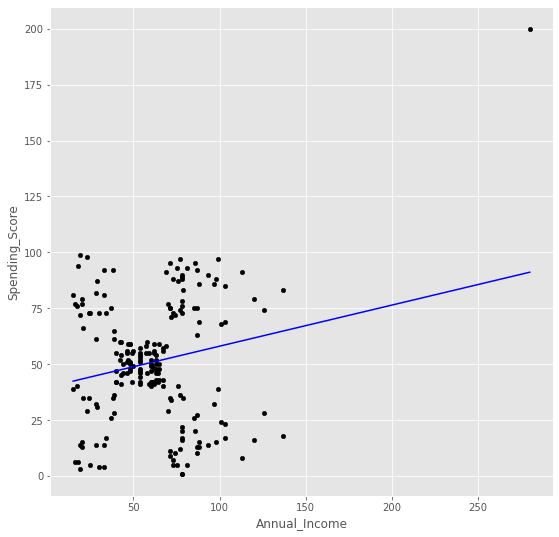

In [10]:
mall_subset = mall[["Spending_Score","Annual_Income"]]

super_customer = pd.DataFrame({"Spending_Score":200,"Annual_Income":280}, index=["super"])

new_customers = mall_subset.append(super_customer)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_customers["Annual_Income"]), 
                     y = new_customers["Spending_Score"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_customers["Annual_Income"]))

# Plot the new model
new_customers.plot(kind="scatter",
           x="Annual_Income",
           y="Spending_Score",
           figsize=(9,9),
           color="black")

# Plot regression line
plt.plot(new_customers["Annual_Income"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

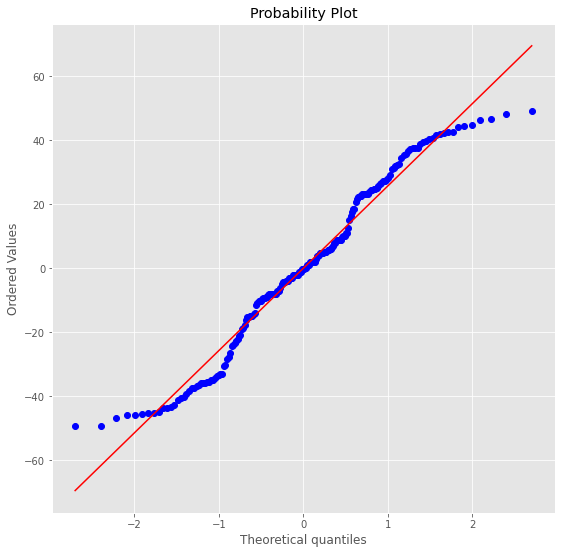

In [11]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

In [12]:
mall

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [14]:
X = mall.iloc[:, [2,3]].values
y = mall.iloc[:, 4].values

In [18]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([14, 95, 48, 48, 10, 13,  6,  5, 14,  5, 51, 40, 75,  5, 46, 77, 73,
       35, 61, 46, 83, 88, 73, 78, 51, 40, 75, 86, 40, 60, 72, 60,  5, 50,
       35, 75, 40,  6, 55, 43, 10, 51, 35, 50, 95, 51, 14, 42, 48, 74],
      dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

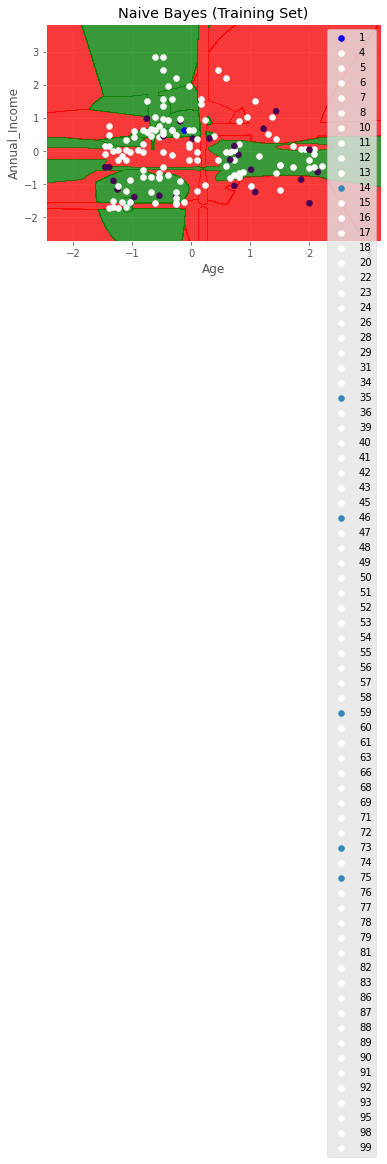

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
       plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c = ListedColormap(('blue', 'white'))(i), label = j)
plt.title('Naive Bayes (Training Set)')
plt.xlabel('Age')
plt.ylabel('Annual_Income')
plt.legend()
plt.show()